In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer

TEST_SIZE = 0.2

In [5]:
# # # # 40000 COLUMNS
# import data
csv_data = pd.read_csv('./Road Accident Data.csv', low_memory=False)
# # print(csv_data)

# clean up typo in data
# # print()
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

# extracting out rows that we want to look at
# # print()
working_data = pd.DataFrame(csv_data[['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area','Accident_Severity']])

col = 'Accident_Severity'
unique_values = working_data[col].unique()

non_slight_data = working_data[working_data['Accident_Severity'] != "Slight"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]

col = 'Accident_Severity'
unique_values = non_slight_data[col].unique()

unique_values = slight_data[col].unique()

slight_data = slight_data.sample(40000)

col = 'Accident_Severity'
unique_values = slight_data[col].unique()

combined_df = pd.concat([non_slight_data, slight_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)

col = 'Accident_Severity'
unique_values = combined_df[col].unique()

working_data.describe()


,Weather_Conditions,Light_Conditions,Road_Type,Time,Urban_or_Rural_Area,Accident_Severity
count,301916,307973,306439,307956,307973,307973
unique,8,5,5,1439,2,3
top,Fine no high winds,Daylight,Single carriageway,17:00,Urban,Slight
freq,244496,227286,230612,2933,198532,263280


In [6]:
data = combined_df.copy()  # Make a copy of the original DataFrame

X = data.drop('Accident_Severity', axis=1)
Y = data['Accident_Severity']
X['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    51367
Rural    33326
Name: count, dtype: int64

In [7]:
categorical_features = ['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [8]:
# Extract feature names
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = ['feature'+str(i) for i in range(X_encoded.shape[1])]

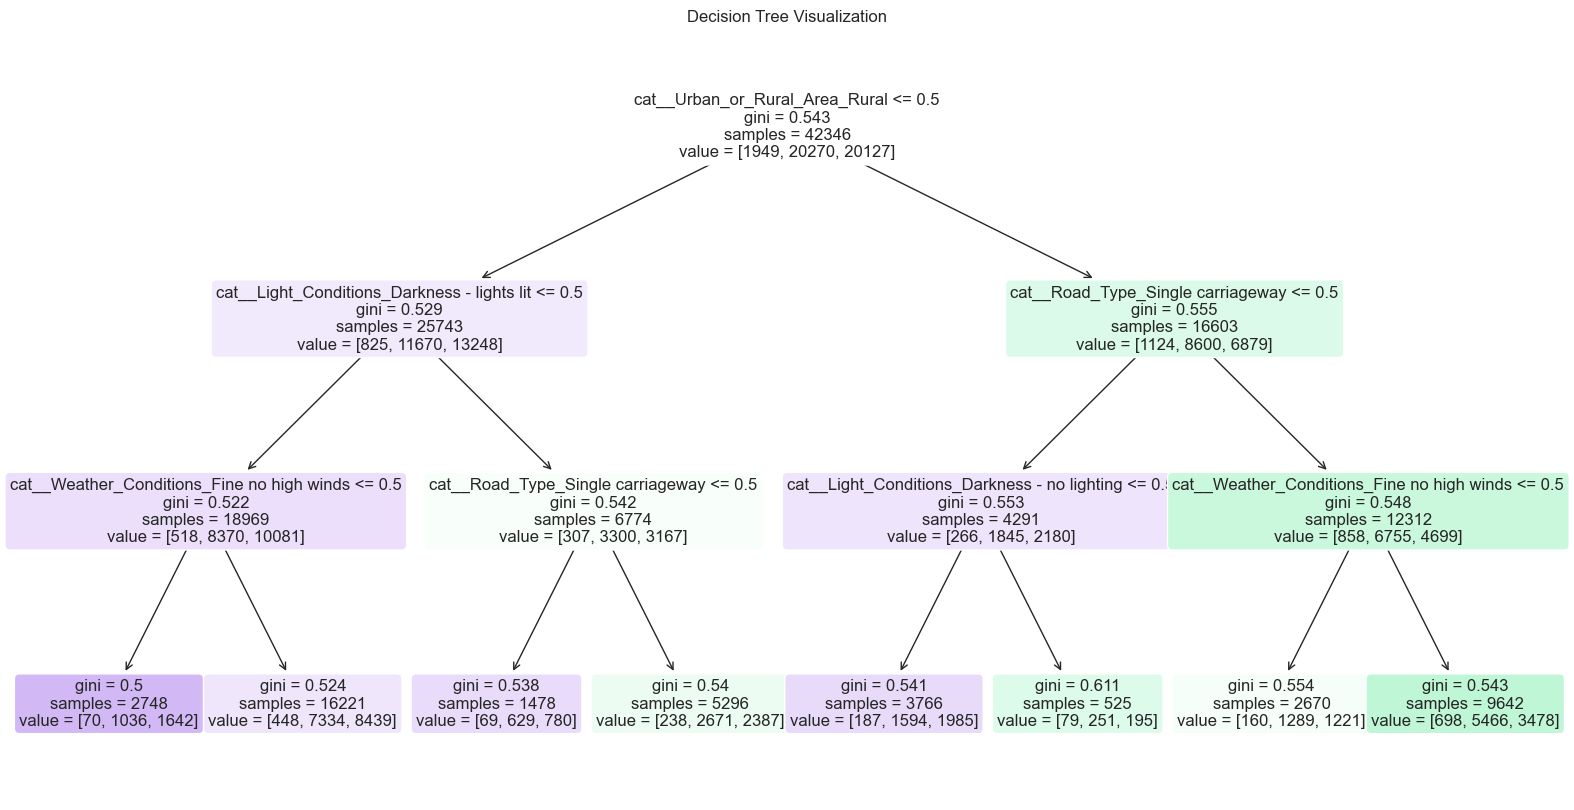

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1) #Random state of one is being used to get reproduceable results
tree_model = DecisionTreeClassifier(max_depth=3) #verbose to monitor progress 
tree_model.fit(X_train, y_train)

#class_names = ['Serious', 'Fetal','Slight']
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model, filled=True, feature_names=feature_names.tolist(), fontsize = 12, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()


In [10]:
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.527876827166033


C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      2004
     Serious       0.53      0.47      0.50     20470
      Slight       0.52      0.64      0.57     19873

    accuracy                           0.53     42347
   macro avg       0.35      0.37      0.36     42347
weighted avg       0.50      0.53      0.51     42347

Confusion Matrix:
[[    0  1230   774]
 [    0  9703 10767]
 [    0  7222 12651]]


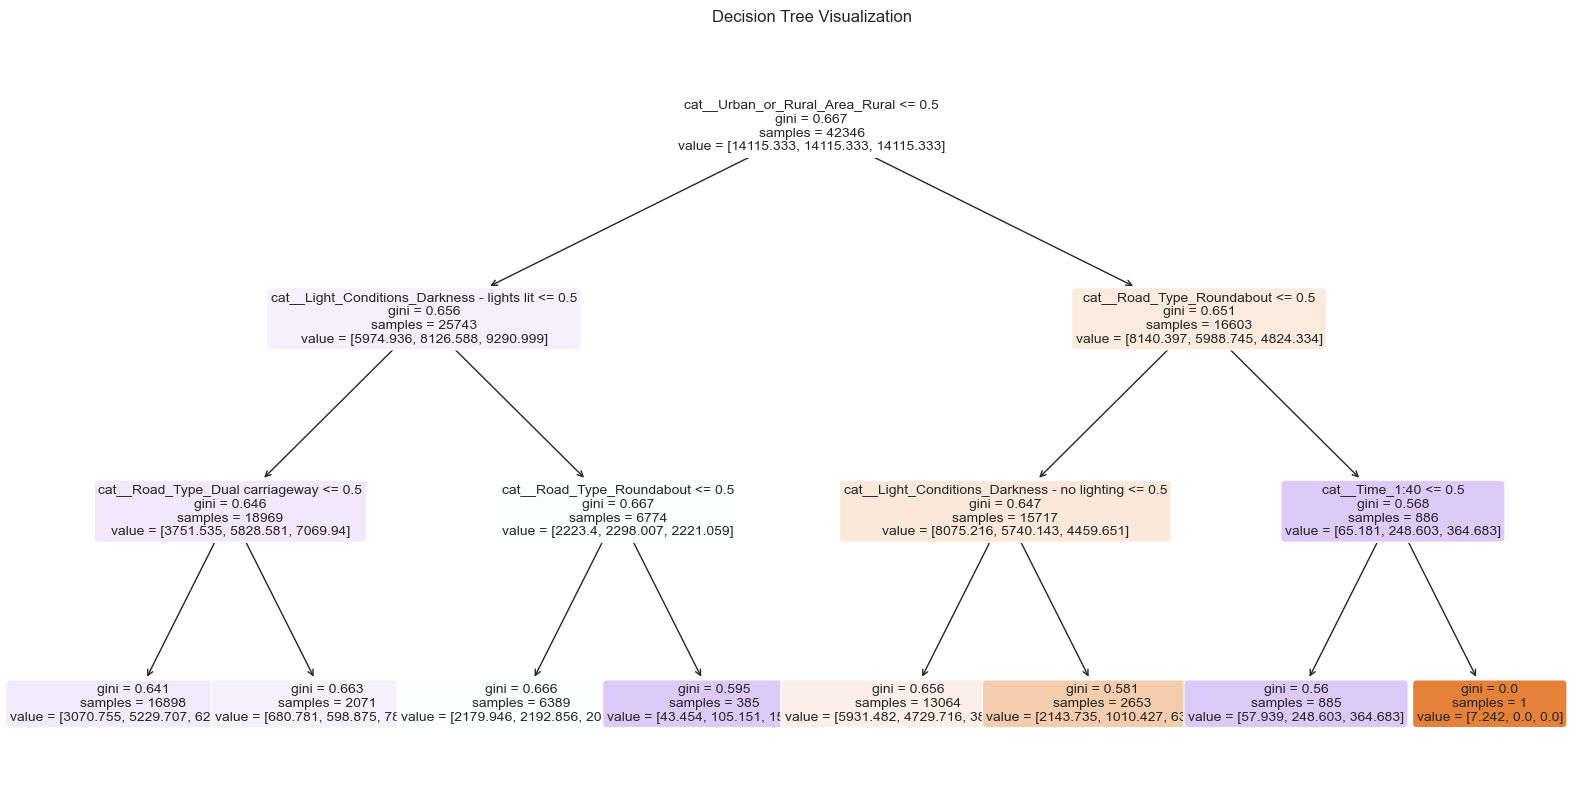

In [11]:
tree_model2 = DecisionTreeClassifier(max_depth=3,class_weight='balanced') #class_weight='balanced' to adjust weights inversely proportional to class frequencies
tree_model2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model2, filled=True, feature_names=feature_names.tolist(), fontsize = 10, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()

In [12]:
y_pred2 = tree_model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred2)}")

Accuracy: 0.3586322525798758
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.08      0.60      0.14      2004
     Serious       0.51      0.16      0.25     20470
      Slight       0.53      0.54      0.53     19873

    accuracy                           0.36     42347
   macro avg       0.37      0.43      0.31     42347
weighted avg       0.50      0.36      0.38     42347

Confusion Matrix:
[[ 1208   299   497]
 [ 8268  3327  8875]
 [ 6357  2864 10652]]
